In [21]:
!pip install kagglehub

  Using cached kagglehub-0.3.12-py3-none-any.whl.metadata (38 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached charset_normalizer-3.4.2-cp311-cp311-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.7.14-py3-none-any.whl.metadata (2.4 kB)
Using cached kagglehub-0.3.12-py3-none-any.whl (67 kB)
Using cached requests-2.32.4-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.4.2-cp311-cp311-win_amd64.whl (105 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
Using cached certifi-2025.7.14-py3-none-any.whl (162 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/7 [urllib3]
   ---------------------------------------- 0/7 [urllib3]
   -----------------------

In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravtopre/bank-customer-churn-dataset")

print("Path to dataset files:", path)

c:\Users\Hp\Desktop\Customer Churn\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 187k/187k [00:00<00:00, 256kB/s]

Extracting files...
Path to dataset files: C:\Users\Hp\.cache\kagglehub\datasets\gauravtopre\bank-customer-churn-dataset\versions\1


In [23]:
for paths in os.listdir(r'C:\Users\Hp\.cache\kagglehub\datasets\gauravtopre\bank-customer-churn-dataset\versions\1'):
    print(paths)
    break


Bank Customer Churn Prediction.csv


In [24]:
df=pd.read_csv(r'C:/Users/Hp/.cache/kagglehub/datasets/gauravtopre/bank-customer-churn-dataset/versions/1/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
import pandas as pd
import yaml

# Load config.yaml
with open('../config/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

print(config)

raw_data_path = config['raw_data_path']

df = pd.read_csv(raw_data_path)

{'raw_data_path': '../data/raw/churn.csv'}


In [4]:
import pandas as pd
df=pd.read_csv(r'../data/raw/churn.csv')

In [5]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 12)

In [7]:
# check for missing values
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# check for column dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [10]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


 ### Univariate Analysis

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as

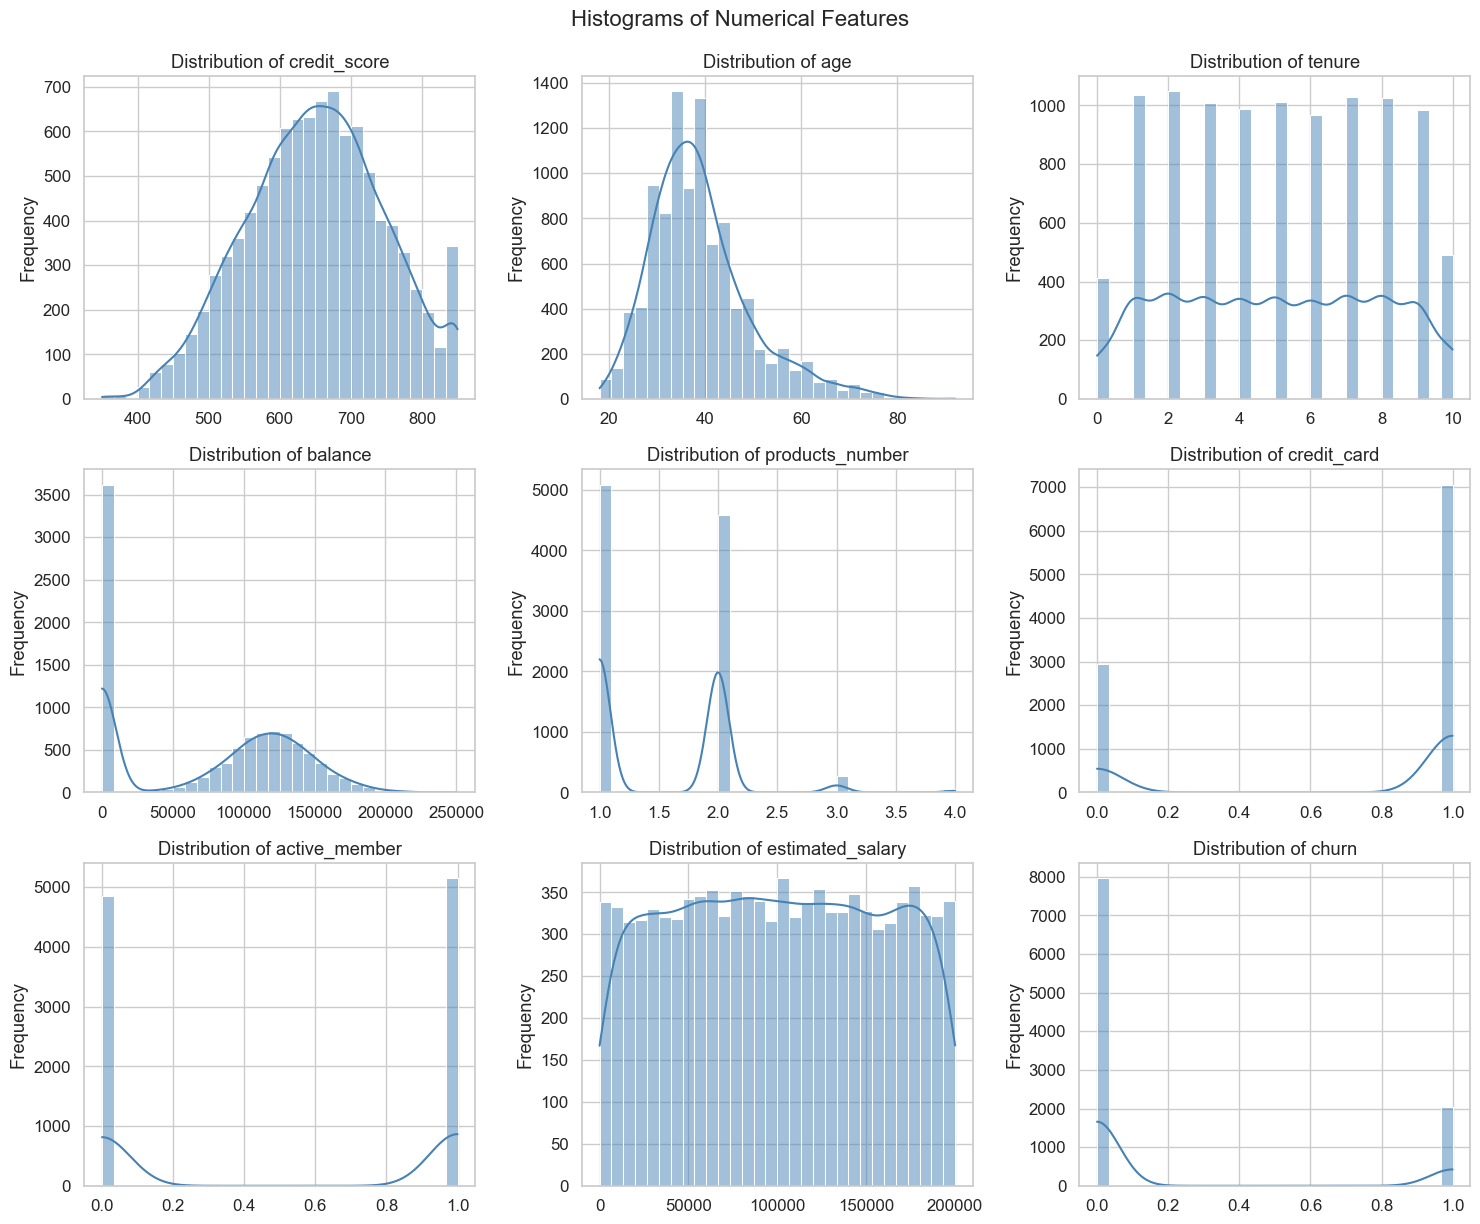

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


numercial_df=df.select_dtypes(include=np.number)
# drop customer id column
numerical_df=numercial_df.drop(columns='customer_id')

# Optional: for better visuals
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Assuming df is your DataFrame
numerical_cols = numerical_df.columns

# Set up the plot grid (3x3 for 9 features)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # flatten the grid to 1D array for easy iteration

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=axes[i], color='steelblue')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency")

# Turn off empty subplots (if any)
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Histograms of Numerical Features", fontsize=16, y=1.02)
plt.show()



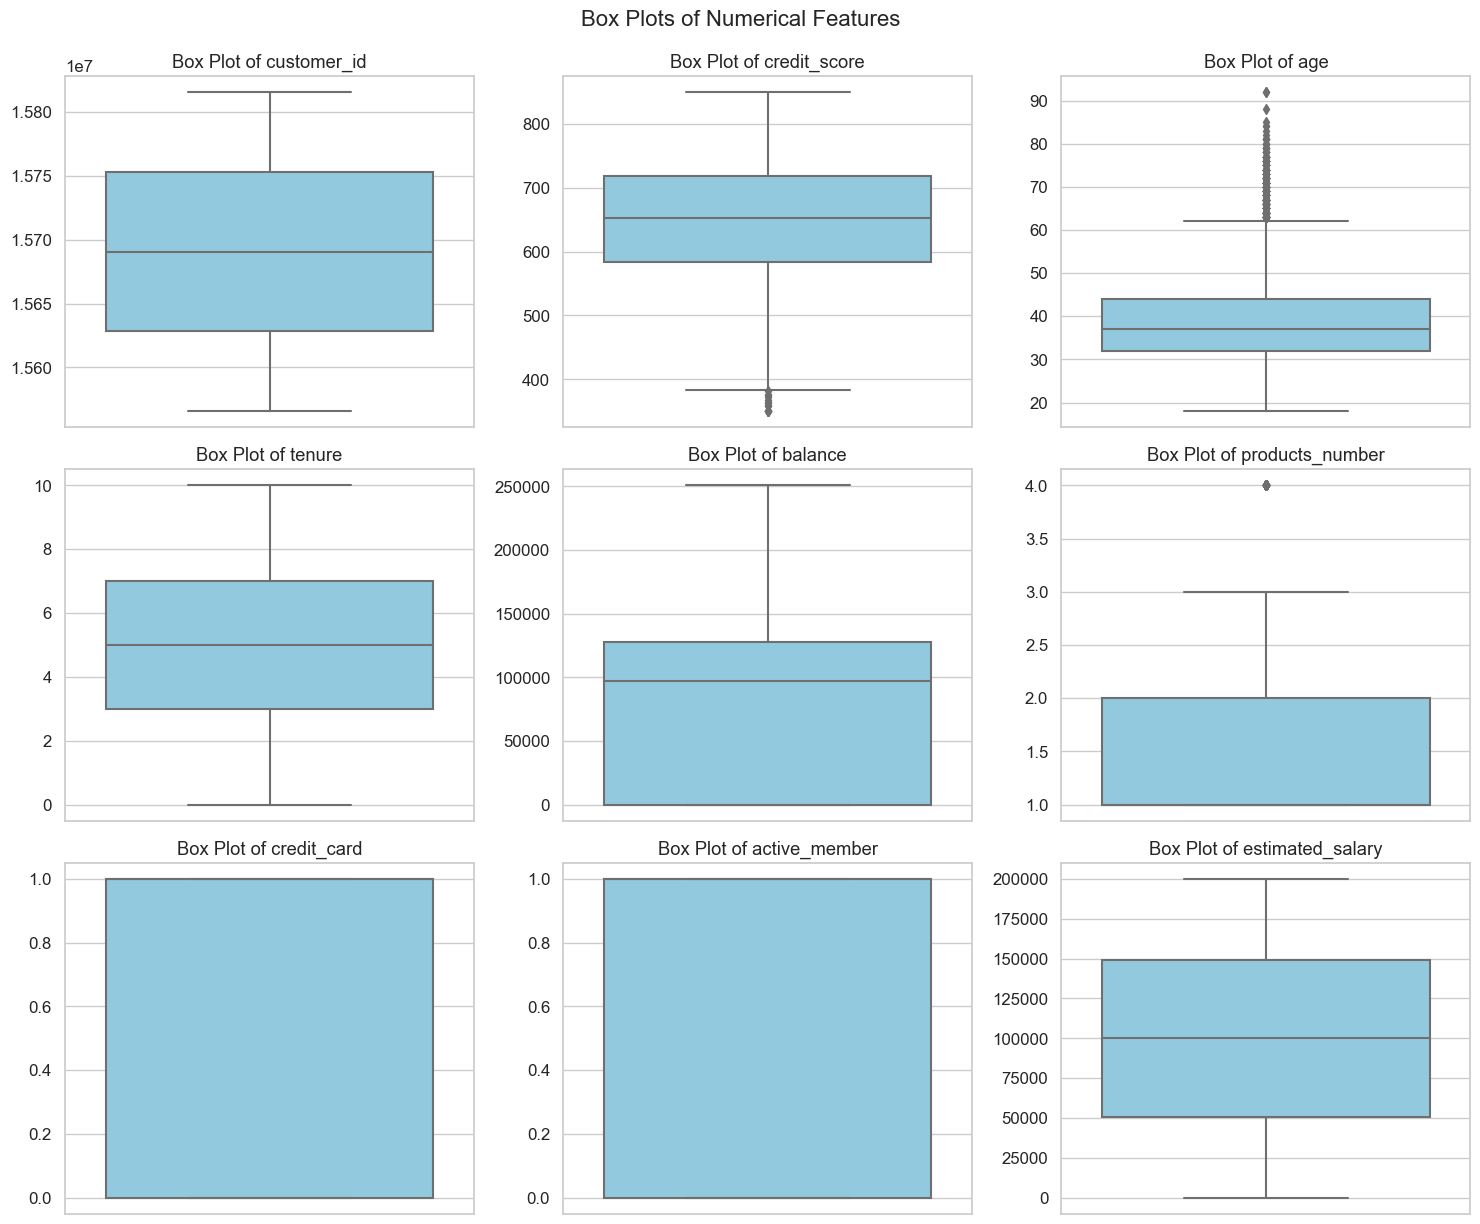

In [15]:
### Box Plot (Outlier Detection)

import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for elegance
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Select 9 numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns[:9]

# Create 3x3 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Box Plot of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Turn off any unused axes
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.suptitle("Box Plots of Numerical Features", fontsize=16, y=1.02)
plt.show()


### Categorical Variables Inspection

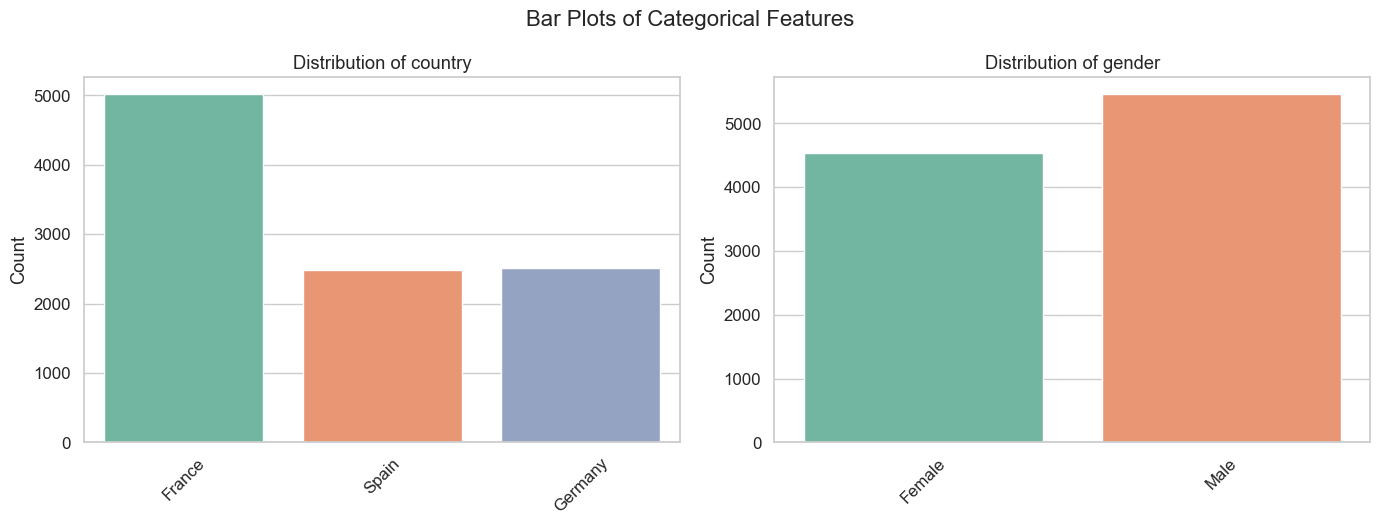

In [16]:
categorical_df=df.select_dtypes(exclude=np.number)
categorical_cols=categorical_df.columns

# Pick the first two categorical columns
cat_cols = categorical_df.columns

# Set seaborn style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

# Create subplot layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)  # Rotate labels if needed

plt.tight_layout()
plt.suptitle("Bar Plots of Categorical Features", fontsize=16, y=1.05)
plt.show()



### Check for class imbalance

<Axes: xlabel='churn'>

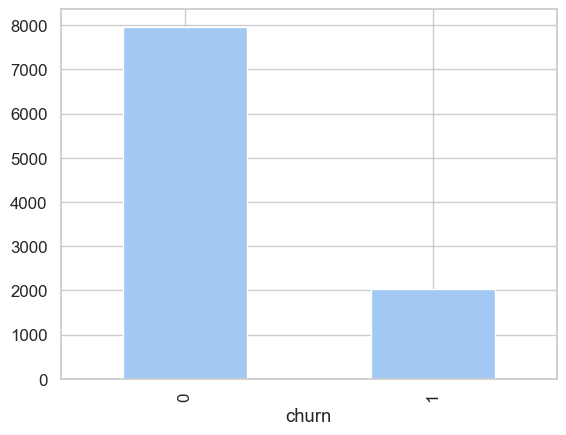

In [17]:
## check for imbalance
df['churn'].value_counts().plot.bar()